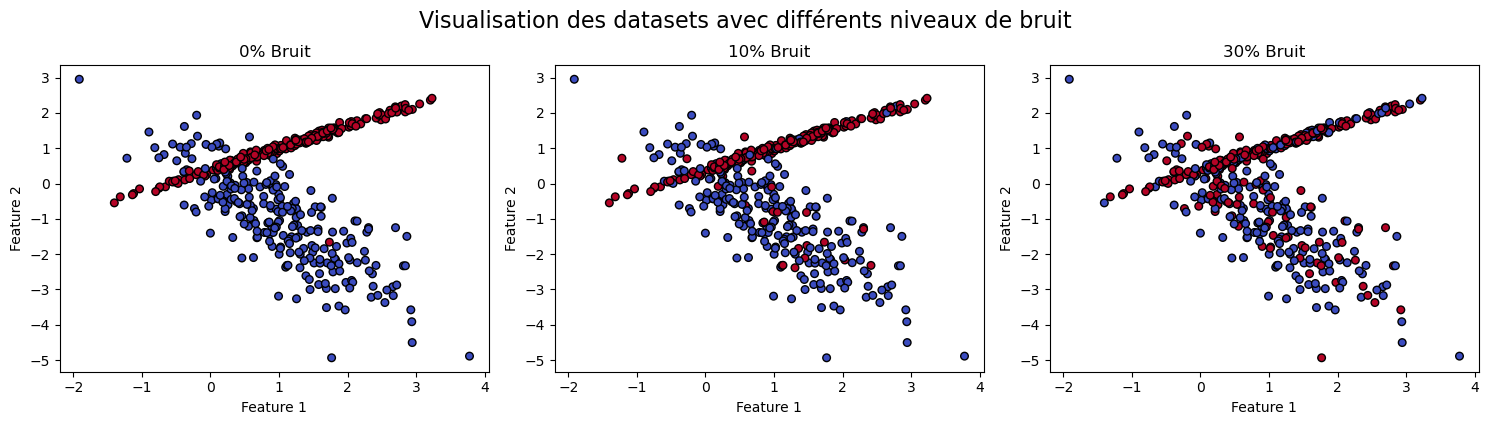

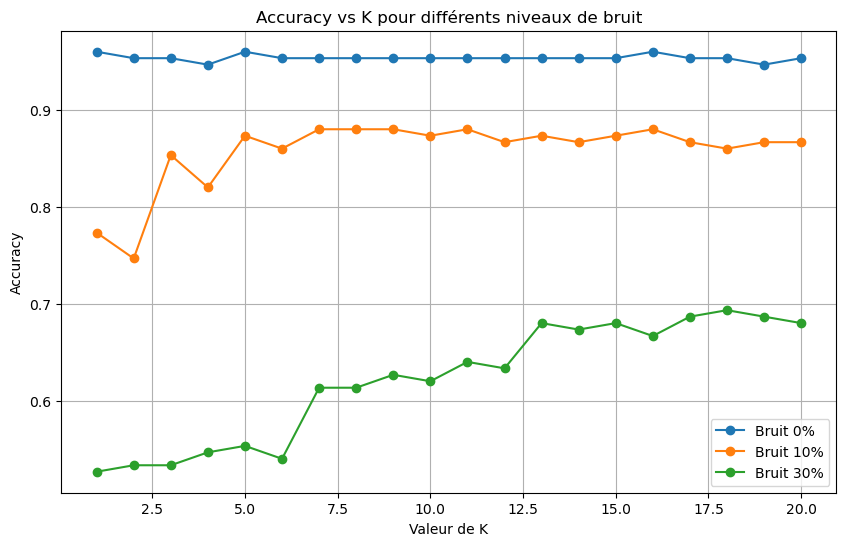

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Fonction pour ajouter du bruit dans les labels
def add_label_noise(y, noise_level, random_state=None):
    rng = np.random.default_rng(random_state)
    n_noisy = int(noise_level * len(y))
    noisy_indices = rng.choice(len(y), n_noisy, replace=False)
    y_noisy = y.copy()
    for idx in noisy_indices:
        y_noisy[idx] = 1 - y_noisy[idx]  # inverser 0<->1
    return y_noisy

# Génération du dataset
X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Niveaux de bruit
noise_levels = [0.0, 0.1, 0.3]
titles = ["0% Bruit", "10% Bruit", "30% Bruit"]
k_values = range(1, 21)

# --- Partie 1 : Visualiser les datasets avec bruit ---
plt.figure(figsize=(15, 4))
for i, noise in enumerate(noise_levels):
    y_noisy = add_label_noise(y, noise, random_state=42)
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y_noisy, cmap='coolwarm', edgecolor='k', s=30)
    plt.title(titles[i])
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
plt.tight_layout()
plt.suptitle("Visualisation des datasets avec différents niveaux de bruit", fontsize=16, y=1.05)
plt.show()

# --- Partie 2 : Tracer accuracy vs K pour chaque bruit ---
plt.figure(figsize=(10, 6))
for noise in noise_levels:
    y_noisy = add_label_noise(y, noise, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.3, random_state=42)

    accuracies = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    plt.plot(k_values, accuracies, marker='o', label=f"Bruit {int(noise * 100)}%")

plt.xlabel("Valeur de K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K pour différents niveaux de bruit")
plt.legend()
plt.grid(True)
plt.show()
